<a href="https://colab.research.google.com/github/Saromych/Neyronka/blob/main/LABML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО:

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [ ]:
#mnist.data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

In [ ]:
#Изображенные цифры (метки классов) содержатся в
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [ ]:
from sklearn.model_selection import train_test_split
X = mnist.data.to_numpy()
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 1)

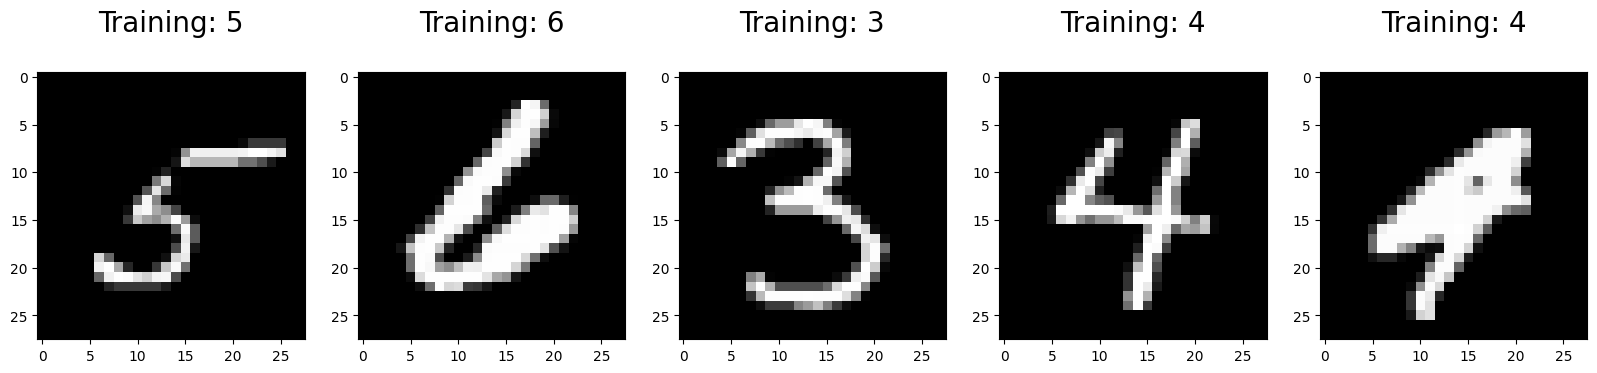

In [ ]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели?

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [ ]:
%%time
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

CPU times: user 9.71 s, sys: 1.77 s, total: 11.5 s
Wall time: 8.64 s


LinearRegression()

In [ ]:

y_predict = linear_model.predict(X_test)

y_test = list(map(int,y_test))
y_predict = list(map(int,y_predict))
print(y_test)
print(y_predict)
accuracy_score(y_test,y_predict)

[6, 2, 7, 5, 7, 6, 3, 5, 1, 3, 1, 2, 5, 3, 6, 1, 0, 9, 4, 3, 1, 5, 8, 3, 4, 7, 3, 6, 5, 1, 6, 9, 2, 1, 1, 0, 7, 3, 4, 1, 5, 1, 7, 1, 4, 9, 5, 7, 7, 0, 0, 7, 0, 0, 1, 3, 9, 7, 4, 3, 5, 1, 7, 8, 5, 9, 4, 0, 7, 1, 1, 1, 0, 3, 1, 9, 3, 7, 6, 4, 9, 2, 3, 8, 7, 0, 2, 2, 6, 9, 6, 5, 1, 6, 7, 8, 4, 6, 8, 0, 8, 7, 0, 6, 2, 1, 0, 9, 6, 1, 1, 0, 9, 3, 8, 1, 2, 9, 0, 5, 9, 1, 4, 4, 3, 8, 3, 2, 1, 7, 1, 2, 3, 6, 4, 1, 7, 9, 5, 8, 2, 2, 8, 7, 1, 9, 9, 9, 5, 4, 9, 9, 9, 3, 4, 8, 2, 9, 5, 0, 9, 1, 6, 4, 5, 1, 7, 6, 7, 8, 2, 7, 8, 2, 2, 2, 7, 0, 1, 7, 9, 3, 5, 0, 2, 2, 9, 1, 0, 9, 1, 9, 4, 7, 5, 1, 0, 2, 6, 3, 2, 1, 4, 8, 6, 4, 4, 3, 6, 3, 3, 7, 1, 8, 2, 9, 9, 0, 1, 8, 4, 3, 3, 0, 9, 2, 5, 7, 9, 9, 9, 5, 6, 1, 5, 2, 0, 9, 4, 2, 1, 5, 7, 1, 3, 5, 7, 1, 0, 7, 4, 1, 7, 0, 5, 0, 7, 1, 5, 5, 8, 6, 9, 1, 0, 4, 9, 9, 5, 0, 8, 1, 9, 8, 6, 1, 9, 2, 3, 7, 8, 7, 2, 4, 3, 4, 9, 0, 6, 2, 1, 4, 3, 3, 4, 0, 9, 6, 2, 3, 6, 4, 8, 0, 0, 3, 8, 3, 3, 6, 0, 2, 5, 8, 1, 2, 9, 3, 3, 1, 6, 4, 8, 7, 6, 0, 6, 3, 2, 8, 1, 1, 6, 

0.26071428571428573

In [ ]:
%%time
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

CPU times: user 2.6 s, sys: 387 ms, total: 2.99 s
Wall time: 1.68 s


Ridge()

In [ ]:

y_predict = ridge_model.predict(X_test)

y_test = list(map(int,y_test))
y_predict = list(map(int,y_predict))
print(y_test)
print(y_predict)
accuracy_score(y_test,y_predict)

[6, 2, 7, 5, 7, 6, 3, 5, 1, 3, 1, 2, 5, 3, 6, 1, 0, 9, 4, 3, 1, 5, 8, 3, 4, 7, 3, 6, 5, 1, 6, 9, 2, 1, 1, 0, 7, 3, 4, 1, 5, 1, 7, 1, 4, 9, 5, 7, 7, 0, 0, 7, 0, 0, 1, 3, 9, 7, 4, 3, 5, 1, 7, 8, 5, 9, 4, 0, 7, 1, 1, 1, 0, 3, 1, 9, 3, 7, 6, 4, 9, 2, 3, 8, 7, 0, 2, 2, 6, 9, 6, 5, 1, 6, 7, 8, 4, 6, 8, 0, 8, 7, 0, 6, 2, 1, 0, 9, 6, 1, 1, 0, 9, 3, 8, 1, 2, 9, 0, 5, 9, 1, 4, 4, 3, 8, 3, 2, 1, 7, 1, 2, 3, 6, 4, 1, 7, 9, 5, 8, 2, 2, 8, 7, 1, 9, 9, 9, 5, 4, 9, 9, 9, 3, 4, 8, 2, 9, 5, 0, 9, 1, 6, 4, 5, 1, 7, 6, 7, 8, 2, 7, 8, 2, 2, 2, 7, 0, 1, 7, 9, 3, 5, 0, 2, 2, 9, 1, 0, 9, 1, 9, 4, 7, 5, 1, 0, 2, 6, 3, 2, 1, 4, 8, 6, 4, 4, 3, 6, 3, 3, 7, 1, 8, 2, 9, 9, 0, 1, 8, 4, 3, 3, 0, 9, 2, 5, 7, 9, 9, 9, 5, 6, 1, 5, 2, 0, 9, 4, 2, 1, 5, 7, 1, 3, 5, 7, 1, 0, 7, 4, 1, 7, 0, 5, 0, 7, 1, 5, 5, 8, 6, 9, 1, 0, 4, 9, 9, 5, 0, 8, 1, 9, 8, 6, 1, 9, 2, 3, 7, 8, 7, 2, 4, 3, 4, 9, 0, 6, 2, 1, 4, 3, 3, 4, 0, 9, 6, 2, 3, 6, 4, 8, 0, 0, 3, 8, 3, 3, 6, 0, 2, 5, 8, 1, 2, 9, 3, 3, 1, 6, 4, 8, 7, 6, 0, 6, 3, 2, 8, 1, 1, 6, 

0.26185714285714284

In [ ]:
%%time
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)

CPU times: user 11.3 s, sys: 2.01 s, total: 13.3 s
Wall time: 7.81 s


Lasso()

In [ ]:
y_predict = lasso_model.predict(X_test)

y_test = list(map(int,y_test))
y_predict = list(map(int,y_predict))
print(y_test)
print(y_predict)
accuracy_score(y_test,y_predict)

[6, 2, 7, 5, 7, 6, 3, 5, 1, 3, 1, 2, 5, 3, 6, 1, 0, 9, 4, 3, 1, 5, 8, 3, 4, 7, 3, 6, 5, 1, 6, 9, 2, 1, 1, 0, 7, 3, 4, 1, 5, 1, 7, 1, 4, 9, 5, 7, 7, 0, 0, 7, 0, 0, 1, 3, 9, 7, 4, 3, 5, 1, 7, 8, 5, 9, 4, 0, 7, 1, 1, 1, 0, 3, 1, 9, 3, 7, 6, 4, 9, 2, 3, 8, 7, 0, 2, 2, 6, 9, 6, 5, 1, 6, 7, 8, 4, 6, 8, 0, 8, 7, 0, 6, 2, 1, 0, 9, 6, 1, 1, 0, 9, 3, 8, 1, 2, 9, 0, 5, 9, 1, 4, 4, 3, 8, 3, 2, 1, 7, 1, 2, 3, 6, 4, 1, 7, 9, 5, 8, 2, 2, 8, 7, 1, 9, 9, 9, 5, 4, 9, 9, 9, 3, 4, 8, 2, 9, 5, 0, 9, 1, 6, 4, 5, 1, 7, 6, 7, 8, 2, 7, 8, 2, 2, 2, 7, 0, 1, 7, 9, 3, 5, 0, 2, 2, 9, 1, 0, 9, 1, 9, 4, 7, 5, 1, 0, 2, 6, 3, 2, 1, 4, 8, 6, 4, 4, 3, 6, 3, 3, 7, 1, 8, 2, 9, 9, 0, 1, 8, 4, 3, 3, 0, 9, 2, 5, 7, 9, 9, 9, 5, 6, 1, 5, 2, 0, 9, 4, 2, 1, 5, 7, 1, 3, 5, 7, 1, 0, 7, 4, 1, 7, 0, 5, 0, 7, 1, 5, 5, 8, 6, 9, 1, 0, 4, 9, 9, 5, 0, 8, 1, 9, 8, 6, 1, 9, 2, 3, 7, 8, 7, 2, 4, 3, 4, 9, 0, 6, 2, 1, 4, 3, 3, 4, 0, 9, 6, 2, 3, 6, 4, 8, 0, 0, 3, 8, 3, 3, 6, 0, 2, 5, 8, 1, 2, 9, 3, 3, 1, 6, 4, 8, 7, 6, 0, 6, 3, 2, 8, 1, 1, 6, 

0.25185714285714284

У модели Ridge наименьшее время тренировки и наибольший accuracy_score

**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold,GridSearchCV

In [ ]:
models = {
    'knn':
     {
        'model' : KNeighborsClassifier(),
        'params': {
            'n_neighbors' : list(range(1,6))
        }
    },
    'RandomForest':
     {
        'model' : RandomForestClassifier(),
        'params':{
            'n_estimators': [10,50,100,200],
            'max_depth': list(range(3,8))
        }
    },
}

scores = []
for model_name in models:
  print(models[model_name]["params"])
  gr = GridSearchCV(models[model_name]["model"],models[model_name]["params"],verbose = 2)
  gr.fit(X[:5000],y[:5000])
  scores.append([model_name,dict(gr.best_params_),gr.best_score_])
result = pd.DataFrame(scores,columns = ["Model","Params","Score"])
result

{'n_neighbors': [1, 2, 3, 4, 5]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=1; total time=   0.6s
[CV] END ......................................n_neighbors=1; total time=   0.5s
[CV] END ......................................n_neighbors=1; total time=   0.5s
[CV] END ......................................n_neighbors=1; total time=   0.5s
[CV] END ......................................n_neighbors=1; total time=   0.4s
[CV] END ......................................n_neighbors=2; total time=   0.5s
[CV] END ......................................n_neighbors=2; total time=   0.6s
[CV] END ......................................n_neighbors=2; total time=   0.6s
[CV] END ......................................n_neighbors=2; total time=   0.6s
[CV] END ......................................n_neighbors=2; total time=   0.3s
[CV] END ......................................n_neighbors=3; total time=   0.3s
[CV] END .......

,Model,Params,Score
0,knn,{'n_neighbors': 1},0.9320
1,RandomForest,"{'max_depth': 7, 'n_estimators': 100}",0.9034


**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

In [ ]:
#ваше обоснование

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
forest = RandomForestClassifier(max_depth = 7,n_estimators = 100)
X_ = X[:5000]
X_train_, X_test_, y_train, y_test = train_test_split(X_,y[:5000],test_size = 0.1,random_state = 1)

print("knn")
print(np.mean(cross_val_score(knn,X_,y[:5000])))
print("random")
print(np.mean(cross_val_score(forest,X_,y[:5000])))

knn
0.932
random
0.901


**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [ ]:
from sklearn import metrics
conf_matrix = #ваша матрица, используя функцию из metrics

In [ ]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

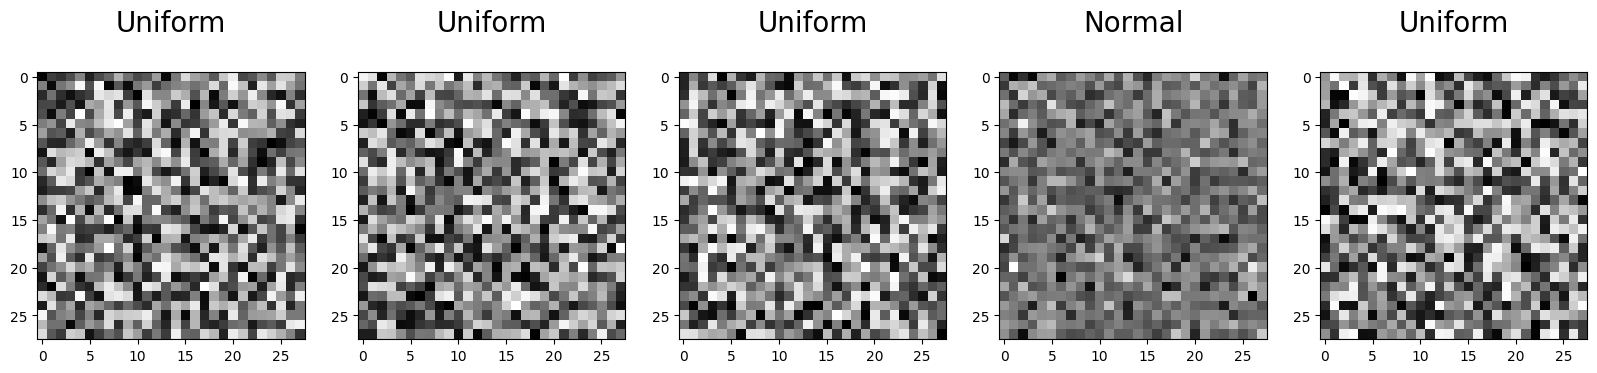

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [ ]:
%%time
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_cut = X_train[:2000]
X_train_cut = scaler.transform(X_train_cut)
tsne_representation = TSNE(n_components = 2).fit_transform(X_train_cut)

CPU times: user 25.7 s, sys: 236 ms, total: 26 s
Wall time: 14.8 s


In [ ]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = list(map(int,y_train[:2000]))
print(tsne_representation)
print(tsne_repr["y"])

[[ -9.040946  -30.838762 ]
 [ 47.733177   -0.9607417]
 [ 16.52914    12.222442 ]
 ...
 [  4.840222   30.955275 ]
 [-44.56259   -29.886019 ]
 [-37.2369    -38.02847  ]]
0       5
1       6
2       3
3       4
4       4
       ..
1995    2
1996    1
1997    0
1998    7
1999    9
Name: y, Length: 2000, dtype: int64


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

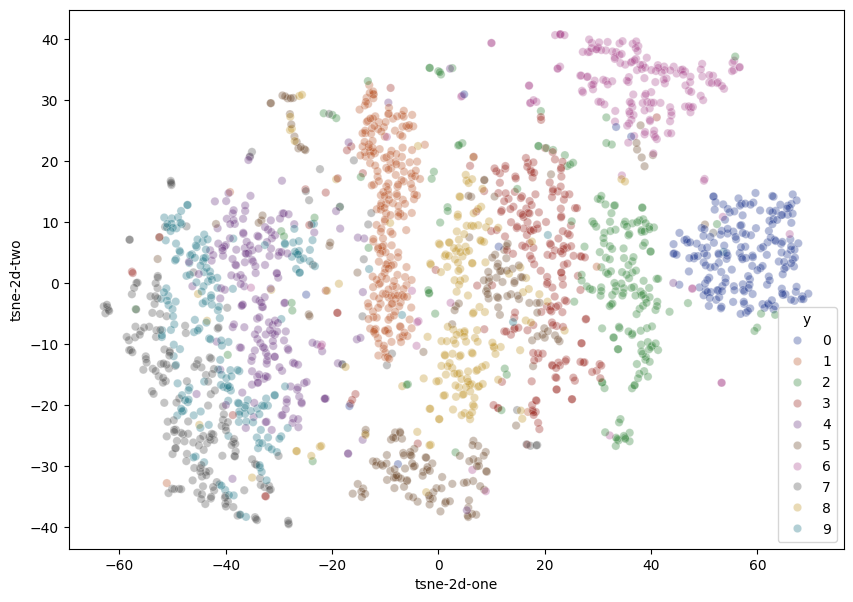

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [ ]:
%%time
from sklearn.decomposition import PCA
pca_representation = PCA(n_components = 2).fit_transform(X_train_cut)

CPU times: user 110 ms, sys: 29.8 ms, total: 140 ms
Wall time: 94.7 ms


<Axes: xlabel='pca-2d-one', ylabel='pca-2d-two'>

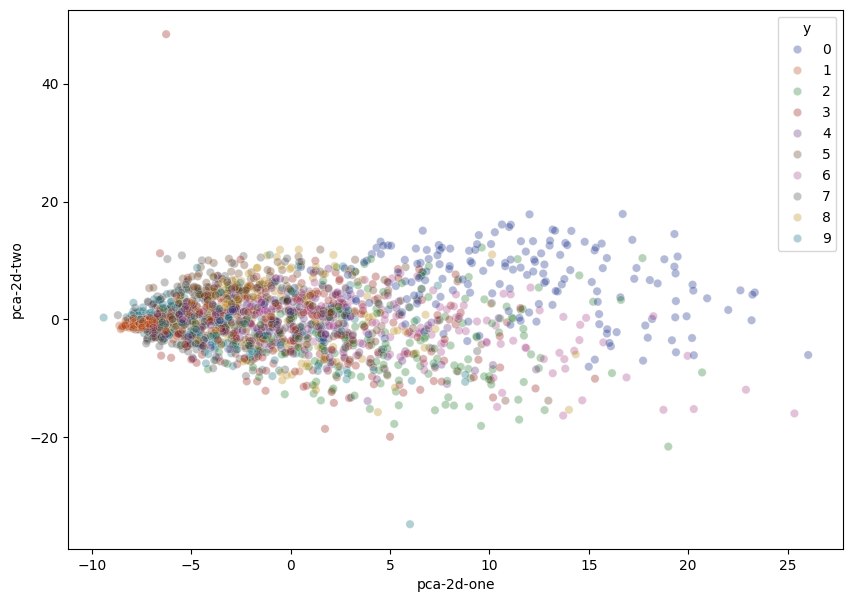

In [ ]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = list(map(int,y_train[:2000]))

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [ ]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,-9.040946,-30.838762,5
1,47.733177,-0.960742,6
2,16.529140,12.222442,3
3,-33.925488,-7.645992,4
4,-32.319950,-22.772148,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [ ]:
# from sklearn.cluster import DBSCAN
# for eps in np.arange(2410,4900,1):
#   dbs = DBSCAN(eps = eps,min_samples = 55)
#   dbs.fit(X_train_cut)
#   dbs_pd=pd.DataFrame({"col" : dbs.labels_})
#   print(dbs_pd["col"].nunique() )
#   if dbs_pd["col"].nunique() == 10 and max(dbs_pd["col"].value_counts()) < 400:
#     break
# dbscan_repr = dbs.labels_

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<ipython-input-116-1a5183472f84>:4: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

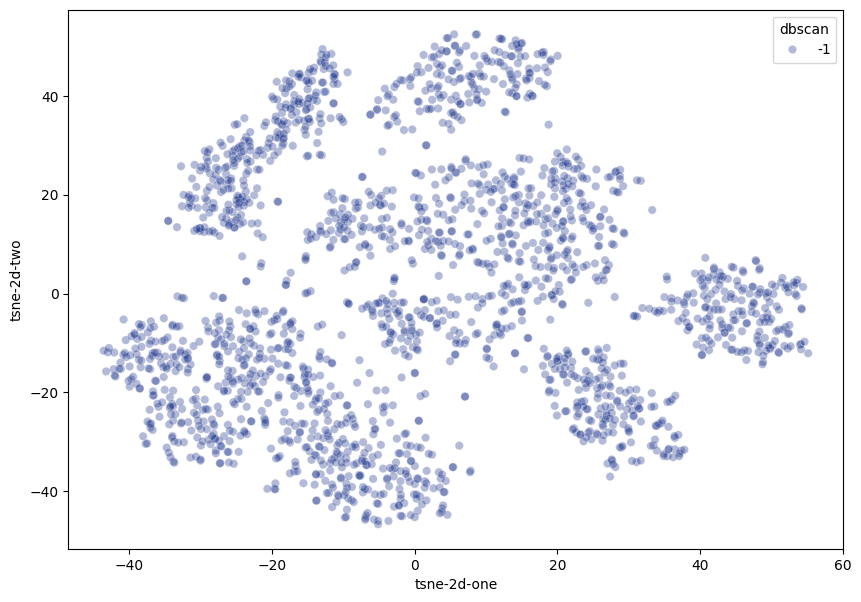

In [ ]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [ ]:
pca_full = PCA()
pca_full.fit(scaler.transform(X_train))
imp = pca_full.explained_variance_ratio_
scores = []
# for i in range(300,400):
#   pc = PCA(n_components = i)
#   pc.fit(X_train)
#   X_train_pca = pc.transform(X_train)
#   X_test_pca = pc.transform(X_test)
#   ridge = Ridge(alpha = 1.0)
#   ridge.fit(X_train_pca,y_train)
#   y_pred = ridge.predict(X_test_pca)
#   score = accuracy_score(list(map(int,y_test)),list(map(int,y_pred)))
#   scores.append(score)
#   print(score)

(0.0, 50.0)

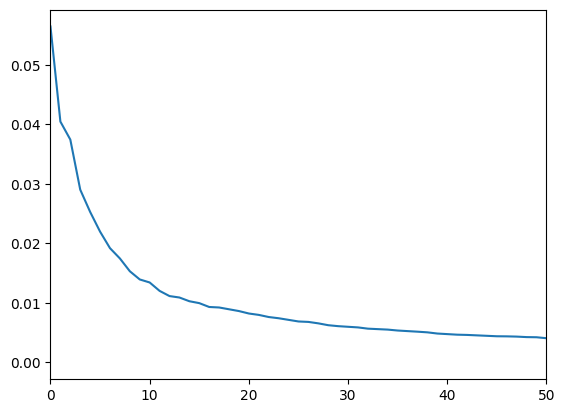

In [ ]:
plt.plot(imp)
plt.xlim([0,50])

In [ ]:
scores = []
for i in range(20,50):
  pc = PCA(n_components = i)
  pc.fit(X_train)
  X_train_pca = pc.transform(X_train)
  X_test_pca = pc.transform(X_test)
  ridge = Ridge(alpha = 1.0)
  ridge.fit(X_train_pca,y_train)
  y_pred = ridge.predict(X_test_pca)
  score = accuracy_score(list(map(int,y_test)),list(map(int,y_pred)))
  scores.append(score)
  print(score)

0.1762857142857143
0.1762857142857143
0.17585714285714285
0.18157142857142858
0.18228571428571427
0.18
0.18928571428571428
0.181
0.18842857142857142
0.18685714285714286
0.18571428571428572
0.18528571428571428
0.19814285714285715
0.19885714285714284
0.20114285714285715
0.20157142857142857
0.2017142857142857
0.20614285714285716
0.20342857142857143
0.20385714285714285
0.205
0.21285714285714286
0.21257142857142858
0.21442857142857144
0.214
0.21828571428571428
0.21814285714285714
0.21628571428571428
0.21571428571428572
0.21985714285714286


In [ ]:
for i in range(50,120):
  pc = PCA(n_components = i)
  pc.fit(X_train)
  X_train_pca = pc.transform(X_train)
  X_test_pca = pc.transform(X_test)
  ridge = Ridge(alpha = 1.0)
  ridge.fit(X_train_pca,y_train)
  y_pred = ridge.predict(X_test_pca)
  score = accuracy_score(list(map(int,y_test)),list(map(int,y_pred)))
  scores.append(score)
  print(score)

0.221
0.223
0.22257142857142856
0.22085714285714286
0.22442857142857142
0.22114285714285714
0.22028571428571428
0.22328571428571428
0.22414285714285714
0.22371428571428573
0.22371428571428573
0.22514285714285714
0.22528571428571428
0.22442857142857142
0.22142857142857142
0.22328571428571428
0.223
0.22185714285714286
0.22328571428571428
0.223
0.22428571428571428
0.22485714285714287
0.22528571428571428
0.22471428571428573
0.22742857142857142
0.22757142857142856
0.22785714285714287
0.22814285714285715
0.22914285714285715
0.22614285714285715
0.229
0.22814285714285715
0.22985714285714287
0.2302857142857143
0.2287142857142857
0.2292857142857143
0.229
0.23057142857142857
0.2332857142857143
0.22914285714285715
0.23542857142857143
0.23514285714285715
0.23642857142857143
0.233
0.2362857142857143
0.237
0.23642857142857143
0.2367142857142857
0.2352857142857143
0.23785714285714285
0.234
0.2377142857142857
0.23357142857142857
0.23185714285714284
0.232
0.2357142857142857
0.23485714285714285
0.233
0.2

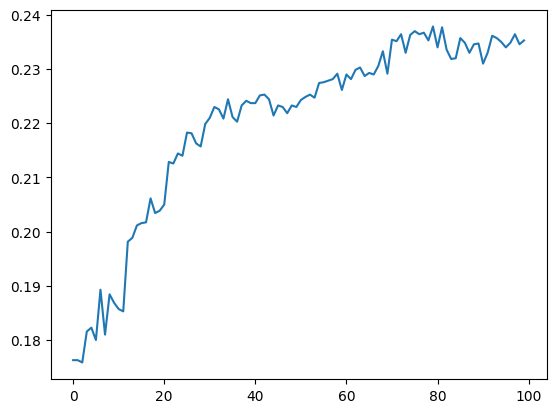

In [ ]:
plt.plot(scores)

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [ ]:
# pc70 = PCA(n_components = 70)
# X_ = pc70.fit_transform(X[:5000])

# models = {
#     'knn':
#      {
#         'model' : KNeighborsClassifier(),
#         'params': {
#             'n_neighbors' : list(range(1,6))
#         }
#     },
#     'RandomForest':
#      {
#         'model' : RandomForestClassifier(),
#         'params':{
#             'n_estimators': [10,50,100,200],
#             'max_depth': list(range(3,8))
#         }
#     },
# }
# kfold = KFold(n_splits = 5)
# scores = []
# for model_name in models:
#   print(models[model_name]["params"])
#   gr = GridSearchCV(models[model_name]["model"],models[model_name]["params"],cv = kfold,verbose = 2)
#   gr.fit(X_,y[:5000])
#   scores.append([model_name,dict(gr.best_params_),gr.best_score_])
# result = pd.DataFrame(scores,columns = ["Model","Params","Score"])
# result

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
forest = RandomForestClassifier(max_depth = 7,n_estimators = 200)
X_train_, X_test_, y_train, y_test = train_test_split(X_,y[:5000],test_size = 0.1,random_state = 1)

print("knn")
knn.fit(X_train_,y_train)
print(np.mean(cross_val_score(knn,X_,y[:5000])))
print("random")
forest.fit(X_train_,y_train)
print(np.mean(cross_val_score(forest,X_,y[:5000])))

knn
0.9276
random
0.9061999999999999



**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь